In [269]:
#taken from website
#https://www.ahmedbesbes.com/blog/kaggle-titanic-competition

In [270]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

In [271]:
#Load training dataset
train_data=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_train.csv", index_col = 'PassengerId')
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [272]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [273]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [274]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [275]:
#load testing dataset
test_data = pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_test.csv", index_col = 'PassengerId')
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [276]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [277]:
test_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [278]:
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [279]:
total_train = train_data.isnull().sum().sort_values(ascending=False)
percent_train = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total_train, percent_train], axis=1, keys=['Total', 'Percent'])
missing_data_train

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [280]:
total_test = test_data.isnull().sum().sort_values(ascending=False)
percent_test = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data_test

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [281]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [282]:
test_data['Cabin'] = test_data['Cabin'].fillna(test_data['Cabin'].mode()[0])
train_data['Cabin'] = train_data['Cabin'].fillna(train_data['Cabin'].mode()[0])

In [283]:
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [284]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())

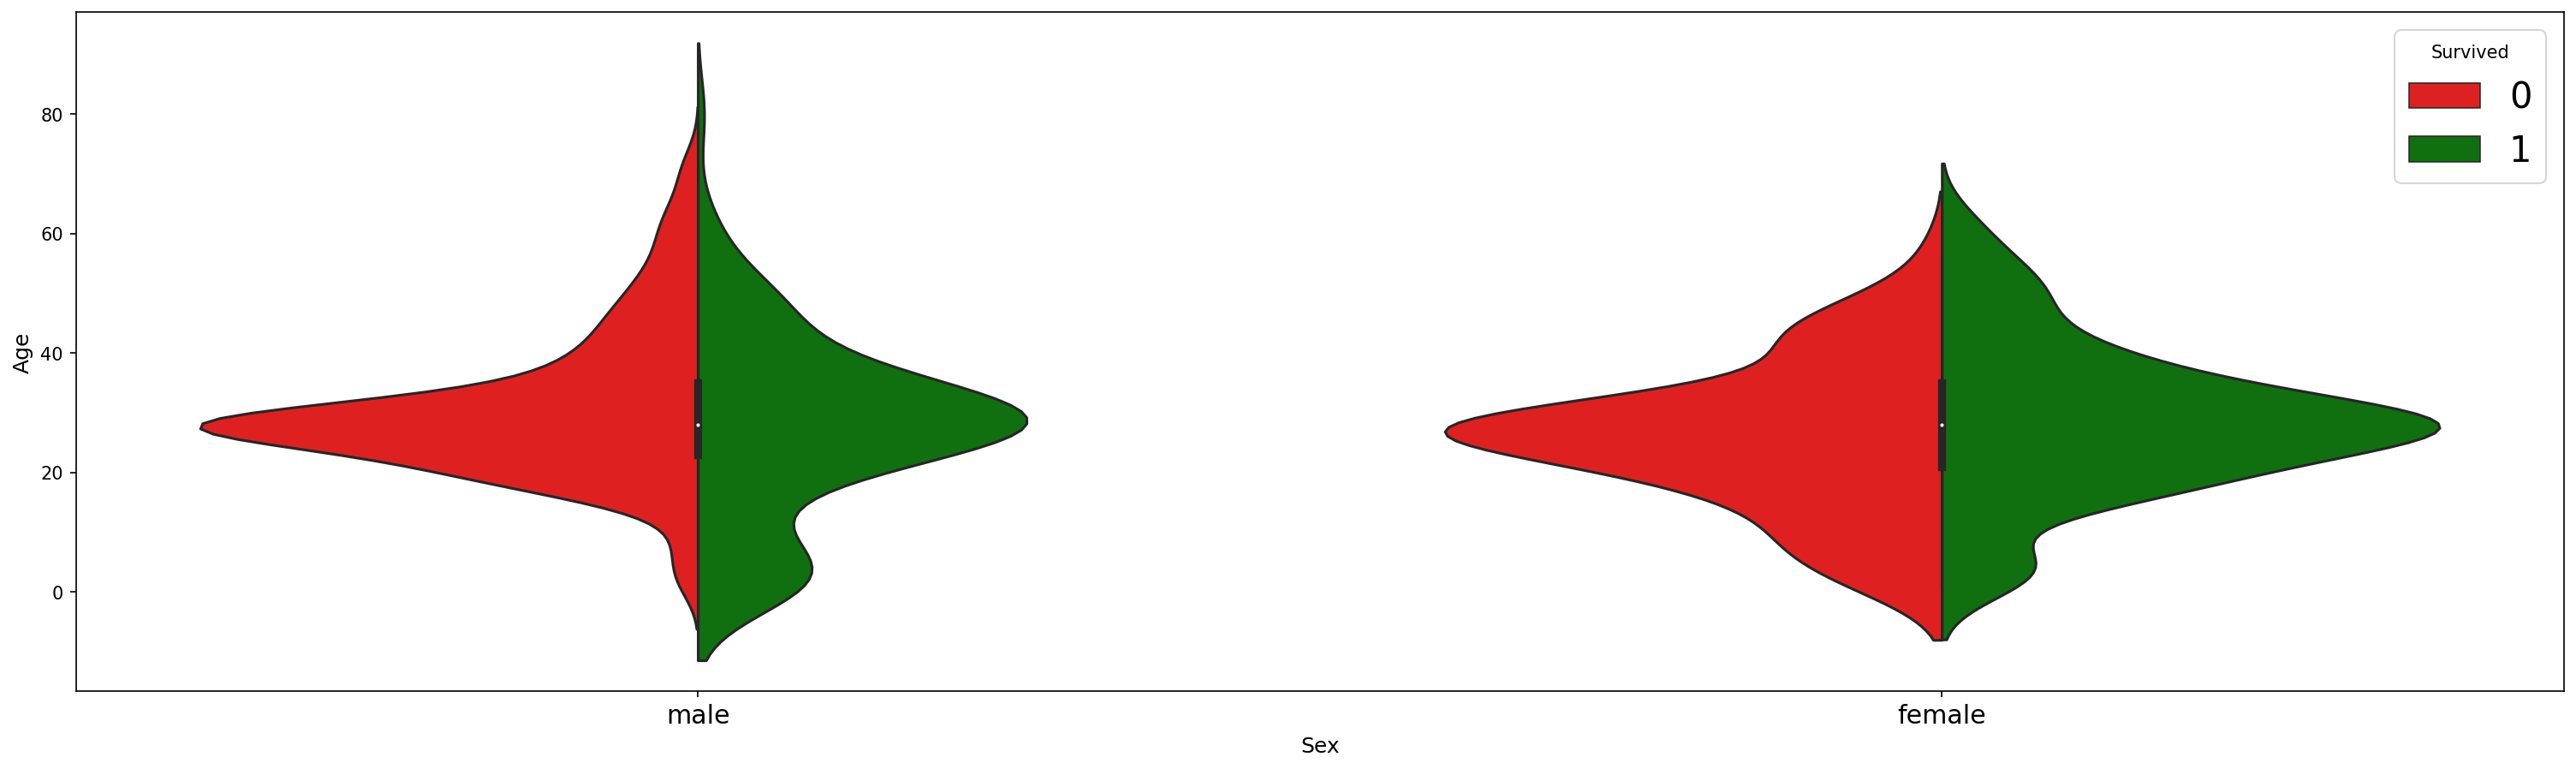

In [287]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_data, split=True,palette={0: "r", 1: "g"});

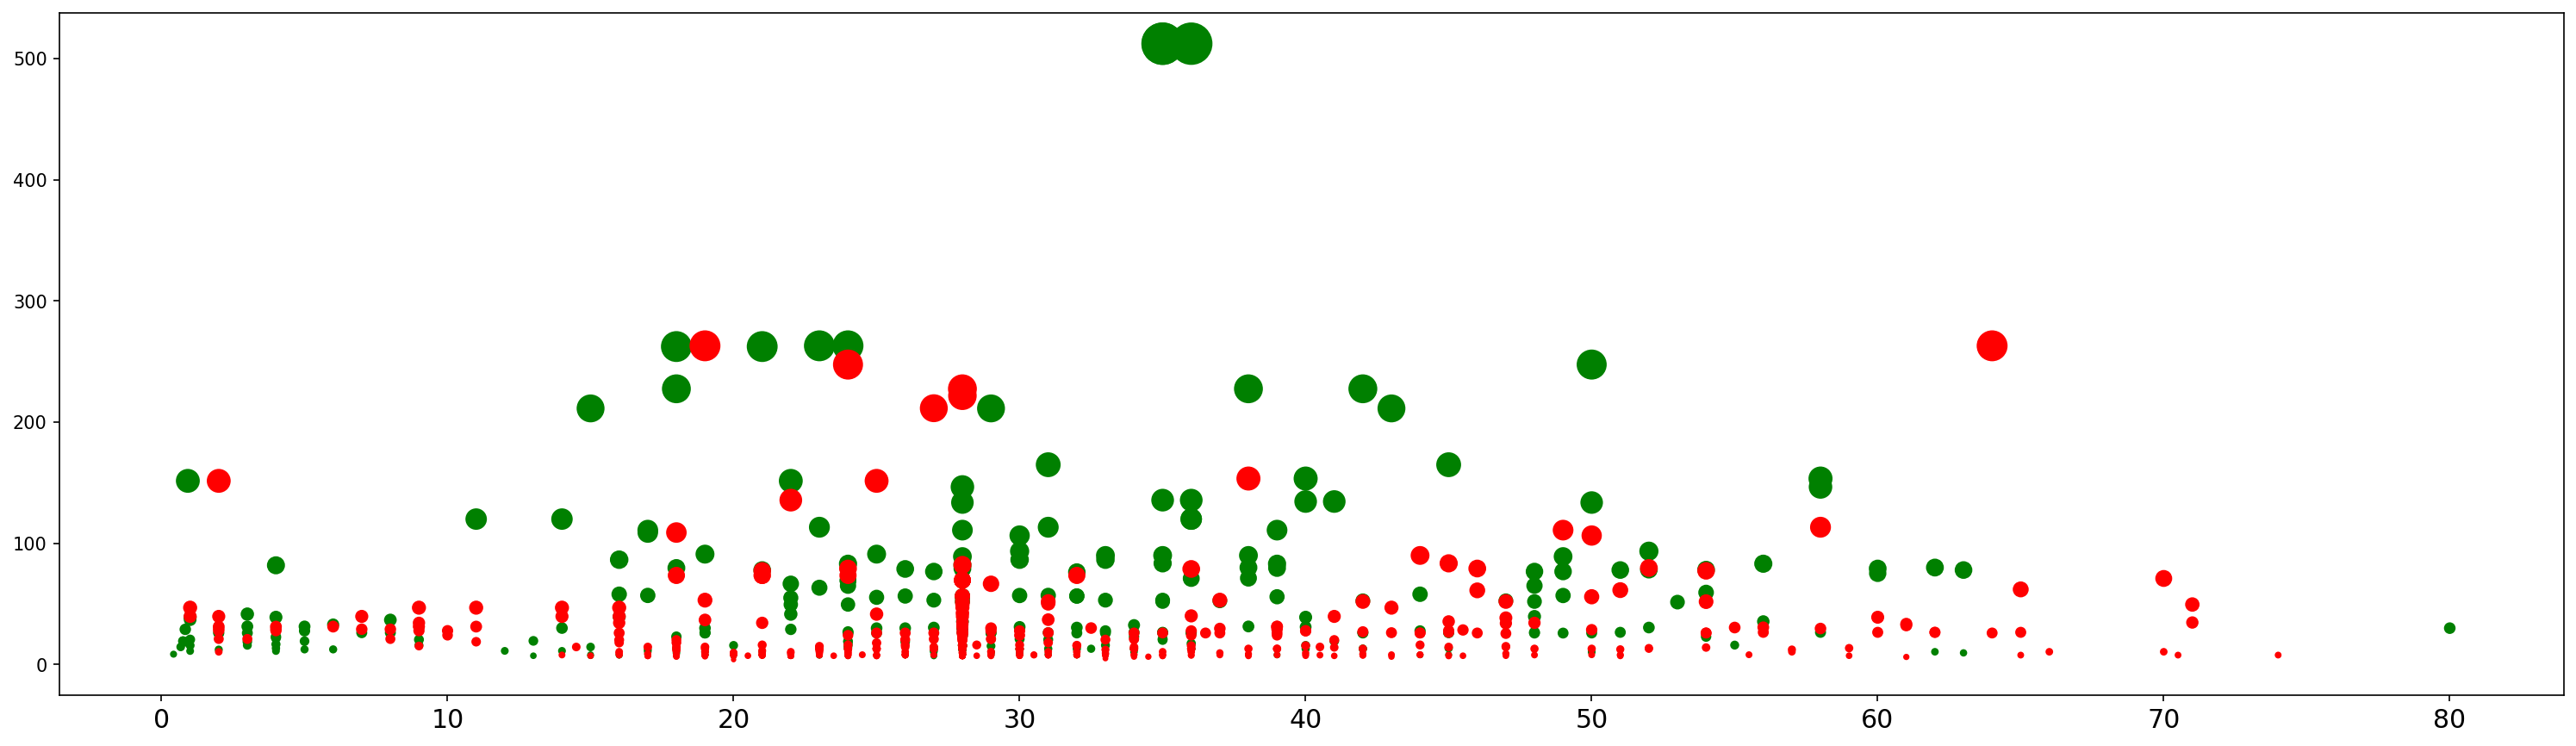

In [289]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()
ax.scatter(train_data[train_data['Survived'] == 1]['Age'], train_data[train_data['Survived'] == 1]['Fare'], c='green', s=train_data[train_data['Survived'] == 1]['Fare'])
ax.scatter(train_data[train_data['Survived'] == 0]['Age'], train_data[train_data['Survived'] == 0]['Fare'], c='red', s=train_data[train_data['Survived'] == 0]['Fare']);

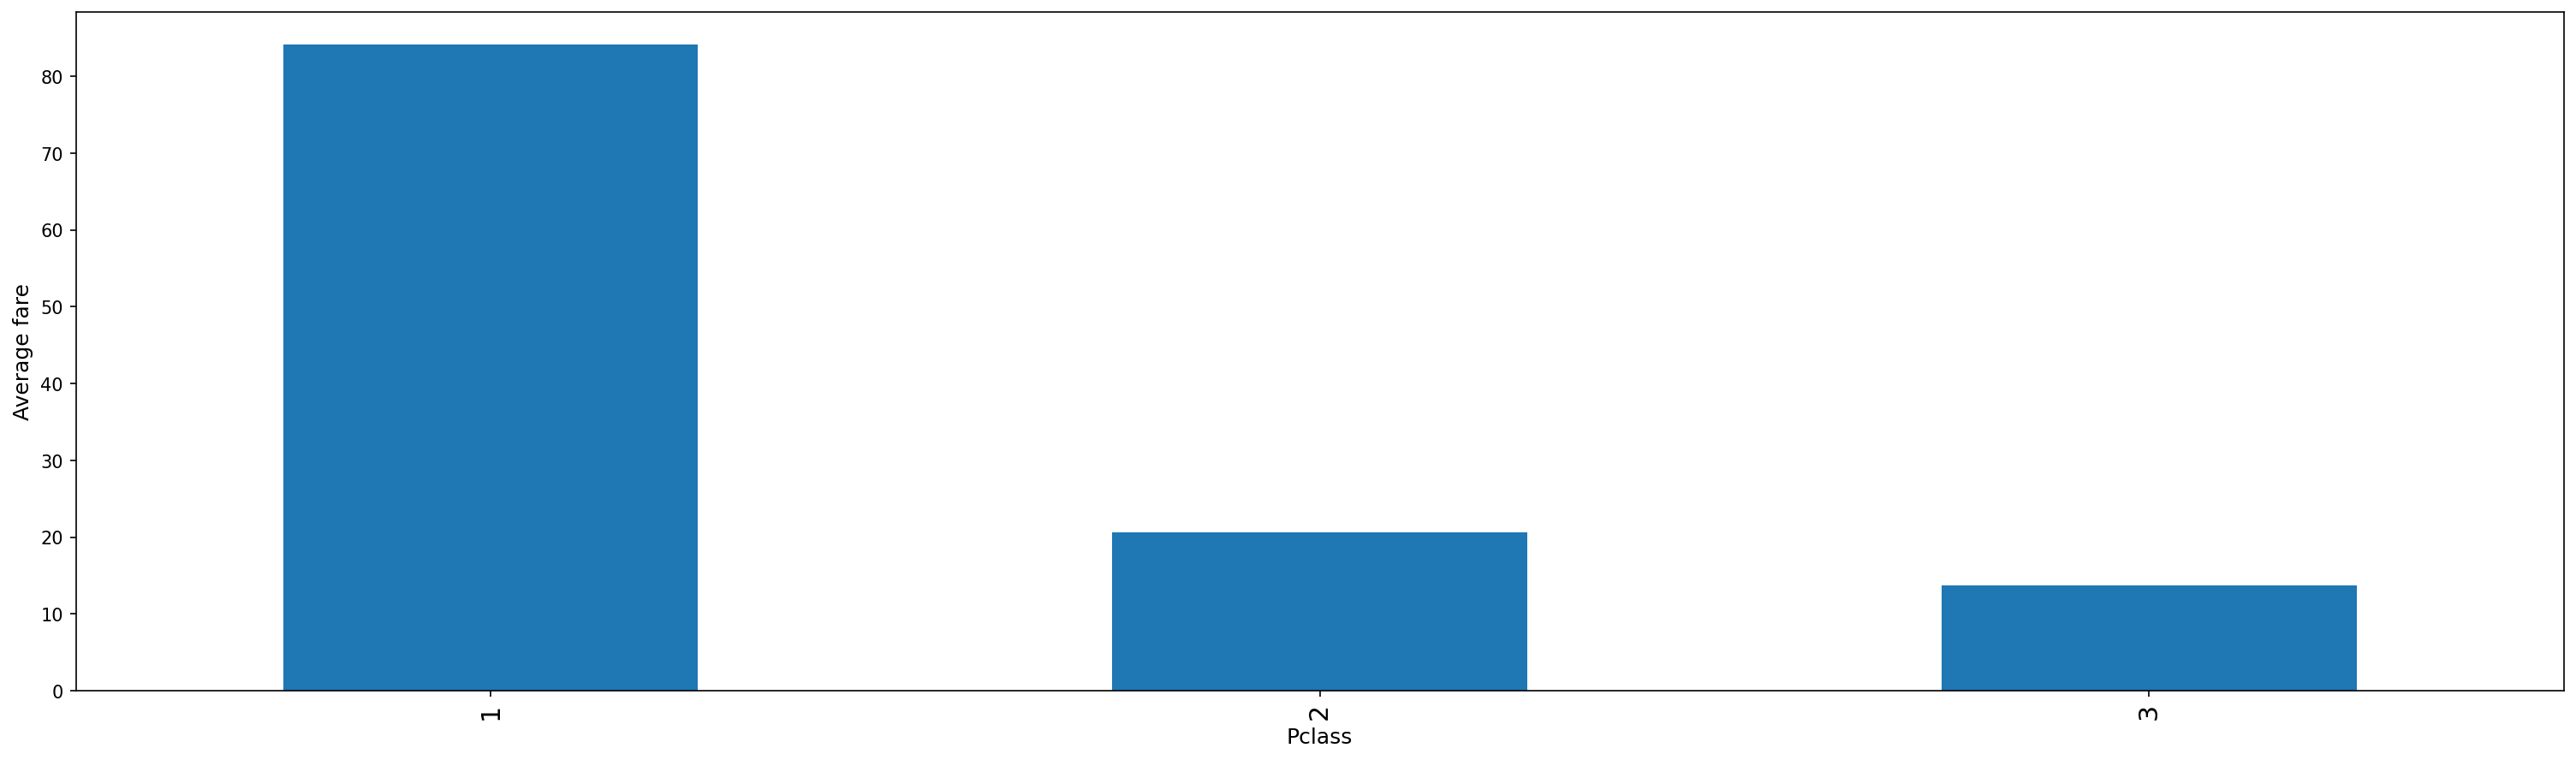

In [290]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
train_data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25, 7), ax = ax);

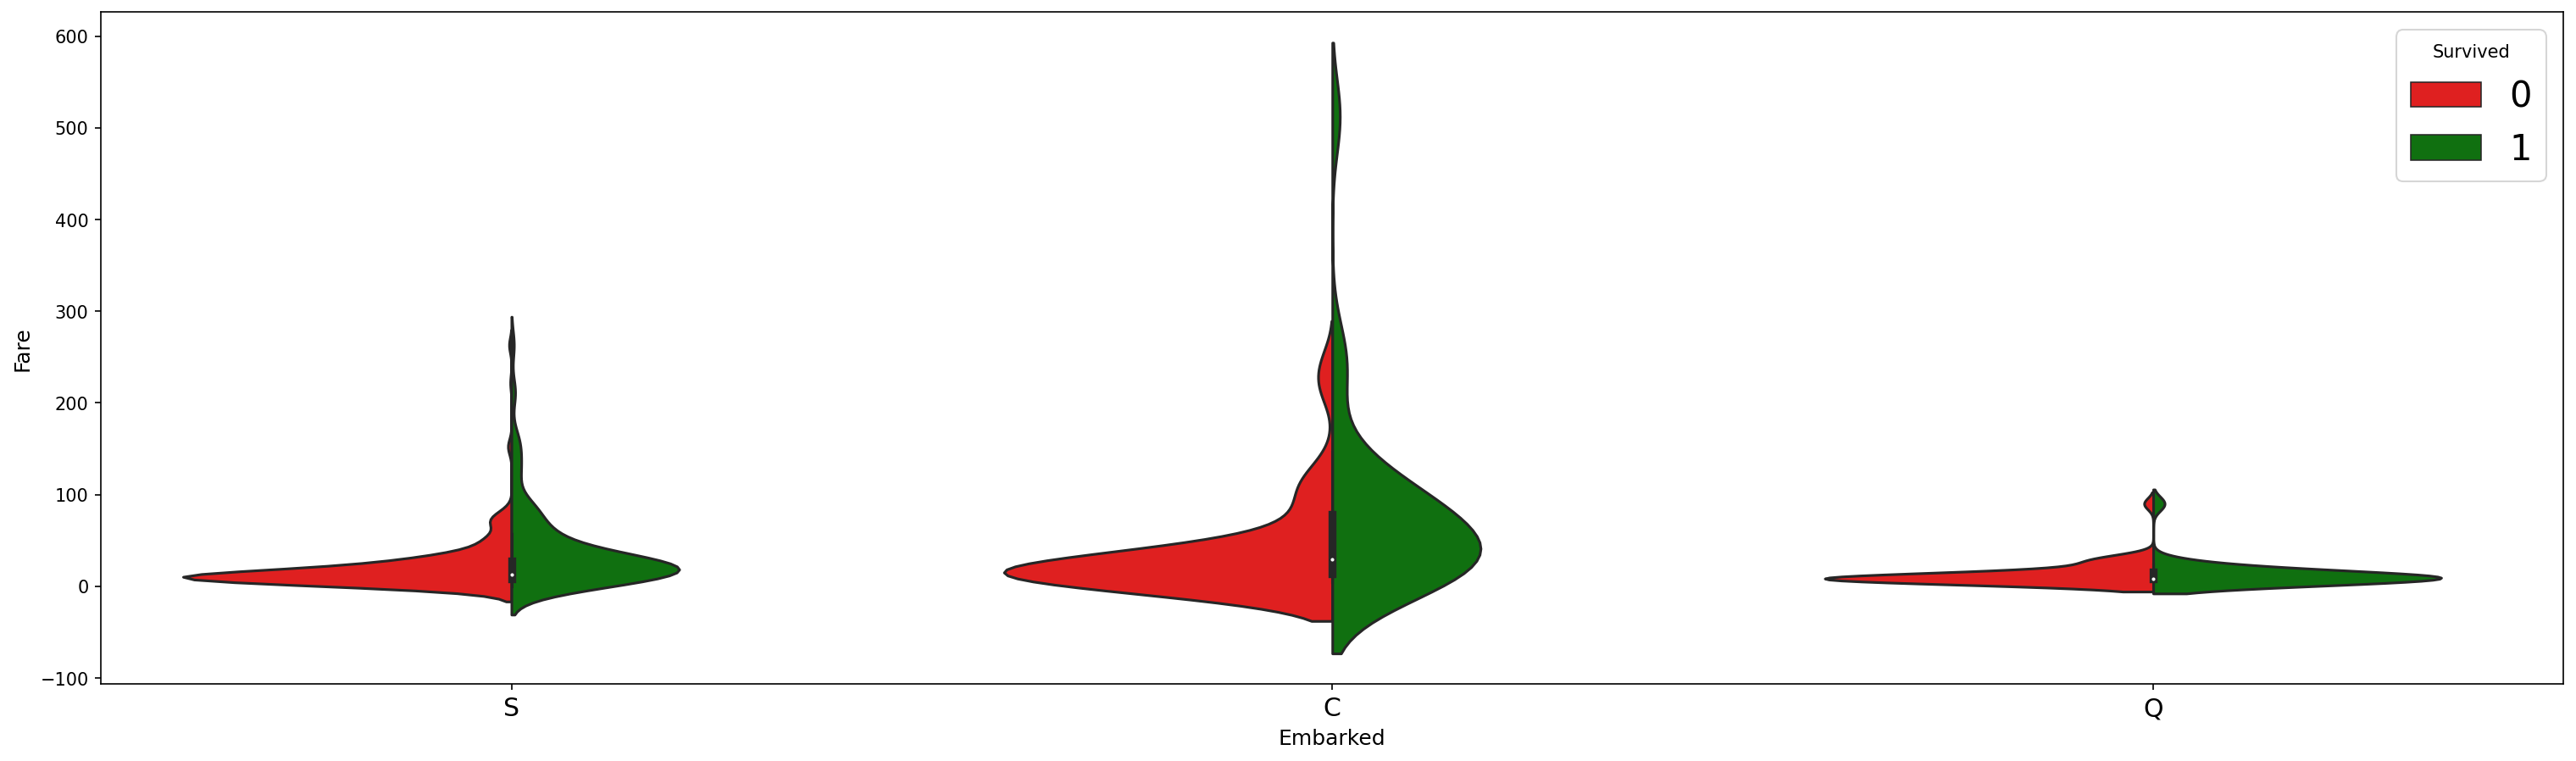

In [291]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=train_data, split=True, palette={0: "r", 1: "g"});

In [292]:
def status(feature):
    print('Processing', feature, ': ok')

In [293]:
def get_combined_data():
    # extracting and then removing the targets from the training data 
    targets = train_data.Survived
    train_data.drop(['Survived'], 1, inplace=True)
    # merging train data and test data for future feature engineering
    # we'll also remove the PassengerID since this is not an informative feature
    combined_data = train_data.append(test_data)
    combined_data.reset_index(inplace=True)
    combined_data.drop(['PassengerId'], inplace=True, axis=1)
    return combined_data
combined_data = get_combined_data()

In [294]:
print(combined_data.shape)

(1309, 10)


In [295]:
combined_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
1307,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,B57 B59 B63 B66,S


In [296]:
titles = set()
for name in train_data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)
# set(['Sir', 'Major', 'the Countess', 'Don', 'Mlle', 'Capt', 'Dr', 'Lady', 'Rev', 'Mrs', 'Jonkheer', 'Master', 'Ms', 'Mr', 'Mme', 'Miss', 'Col'])
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    combined_data['Title'] = combined_data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    # a map of more aggregated title
    # we map each title
    combined_data['Title'] = combined_data.Title.map(Title_Dictionary)
    status('Title')
    return combined_data


{'Mme', 'Miss', 'Mrs', 'Lady', 'Capt', 'Jonkheer', 'Dr', 'Master', 'Don', 'Mr', 'Rev', 'Ms', 'Mlle', 'Col', 'the Countess', 'Major', 'Sir'}


In [297]:
combined_data = get_titles()
combined_data

Processing Title : ok


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S,Mr
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S,Mr
1307,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,B57 B59 B63 B66,S,Mr


In [298]:
combined_data[combined_data['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [299]:
print(combined_data.iloc[:891].Age.isnull().sum())

0


In [300]:
print(combined_data.iloc[891:].Age.isnull().sum())

0


In [301]:
grouped_train = combined_data.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
grouped_median_train

,Sex,Pclass,Title,Age
0,female,1,Miss,29.5
1,female,1,Mrs,38.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0
5,female,2,Mrs,31.5
6,female,3,Miss,22.0
7,female,3,Mrs,29.0
8,male,1,Master,4.0
9,male,1,Mr,36.0


In [302]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]
def process_age():
    global combined_data
    # a function that fills the missing values of the Age variable
    combined_data['Age'] = combined_data.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined_data
combined_data = process_age()

Processing age : ok


In [303]:
def process_names():
    global combined_data
    # we clean the Name variable
    combined_data.drop('Name', axis=1, inplace=True)
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined_data['Title'], prefix='Title')
    combined_data = pd.concat([combined_data, titles_dummies], axis=1)
    # removing the title variable
    combined_data.drop('Title', axis=1, inplace=True)
    status('names')
    return combined_data

In [304]:
combined_data = process_names()
combined_data

Processing names : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,B96 B98,S,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,male,27.0,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S,0,0,1,0,0,0
1305,1,female,39.0,0,0,PC 17758,108.9000,C105,C,0,0,0,0,0,0
1306,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S,0,0,1,0,0,0
1307,3,male,27.0,0,0,359309,8.0500,B57 B59 B63 B66,S,0,0,1,0,0,0


In [305]:
def process_fares():
    global combined_data
    # there's one missing fare value - replacing it with the mean.
    combined_data.Fare.fillna(combined_data.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined_data

In [306]:
combined_data = process_fares()

Processing fare : ok


In [307]:
def process_embarked():
    global combined_data
    # two missing embarked values - filling them with the most frequent one in the train  set(S)
    combined_data.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined_data['Embarked'], prefix='Embarked')
    combined_data = pd.concat([combined_data, embarked_dummies], axis=1)
    combined_data.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined_data

In [308]:
combined_data = process_embarked()
combined_data

Processing embarked : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,B96 B98,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,B96 B98,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,male,27.0,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,0,0,1,0,0,0,0,0,1
1305,1,female,39.0,0,0,PC 17758,108.9000,C105,0,0,0,0,0,0,1,0,0
1306,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,0,0,1,0,0,0,0,0,1
1307,3,male,27.0,0,0,359309,8.0500,B57 B59 B63 B66,0,0,1,0,0,0,0,0,1


In [309]:
train_cabin, test_cabin = set(), set()
for c in combined_data.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
for c in combined_data.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')
print(train_cabin)
# set(['A', 'C', 'B', 'E', 'D', 'G', 'F', 'U', 'T'])
print(test_cabin)
# set(['A', 'C', 'B', 'E', 'D', 'G', 'F', 'U'])

{'A', 'T', 'F', 'C', 'D', 'B', 'E', 'G'}
{'A', 'F', 'C', 'D', 'B', 'E', 'G'}


In [310]:
def process_cabin():
    global combined_data    
    # replacing missing cabins with U (for Uknown)
    combined_data.Cabin.fillna('U', inplace=True)
    # mapping each Cabin value with the cabin letter
    combined_data['Cabin'] = combined_data['Cabin'].map(lambda c: c[0])
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined_data['Cabin'], prefix='Cabin')    
    combined_data = pd.concat([combined_data, cabin_dummies], axis=1)
    combined_data.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined_data

In [311]:
combined_data = process_cabin()

Processing cabin : ok


In [312]:
combined_data

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,male,27.0,0,0,A.5. 3236,8.0500,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1305,1,female,39.0,0,0,PC 17758,108.9000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1306,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1307,3,male,27.0,0,0,359309,8.0500,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [313]:
def process_sex():
    global combined_data
    # mapping string values to numerical one 
    combined_data['Sex'] = combined_data['Sex'].map({'male':1, 'female':0})
    status('Sex')
    return combined_data

In [314]:
combined_data = process_sex()

Processing Sex : ok


In [315]:
def process_pclass():
    global combined_data
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined_data['Pclass'], prefix="Pclass")
    # adding dummy variable
    combined_data = pd.concat([combined_data, pclass_dummies],axis=1)
    # removing "Pclass"
    combined_data.drop('Pclass',axis=1,inplace=True)
    status('Pclass')
    return combined_data

In [316]:
combined_data = process_pclass()

Processing Pclass : ok


In [317]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'
tickets = set()
for t in combined_data['Ticket']:
    tickets.add(cleanTicket(t))
print(len(tickets))
def process_ticket():
    global combined_data
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    # Extracting dummy variables from tickets:
    combined_data['Ticket'] = combined_data['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined_data['Ticket'], prefix='Ticket')
    combined_data = pd.concat([combined_data, tickets_dummies], axis=1)
    combined_data.drop('Ticket', inplace=True, axis=1)
    status('Ticket')
    return combined_data
combined_data = process_ticket()

37
Processing Ticket : ok


In [318]:
def process_family():
    global combined_data
    # introducing a new feature : the size of families (including the passenger)
    combined_data['FamilySize'] = combined_data['Parch'] + combined_data['SibSp'] + 1
    # introducing other features based on the family size
    combined_data['Singleton'] = combined_data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined_data['SmallFamily'] = combined_data['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined_data['LargeFamily'] = combined_data['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    status('family')
    return combined_data

In [319]:
combined_data = process_family()
print(combined_data.shape)

Processing family : ok
(1309, 66)


In [320]:
combined_data

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,27.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1305,0,39.0,0,0,108.9000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1306,1,38.5,0,0,7.2500,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
1307,1,27.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


In [321]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [322]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [323]:
def recover_train_test_target():
    global combined_data
    targets = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_train.csv', usecols=['Survived'])['Survived'].values
    train_data = combined_data.iloc[:891]
    test_data = combined_data.iloc[891:]
    return train_data, test_data, targets
train_data, test_data, targets = recover_train_test_target()

In [324]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train_data, targets)

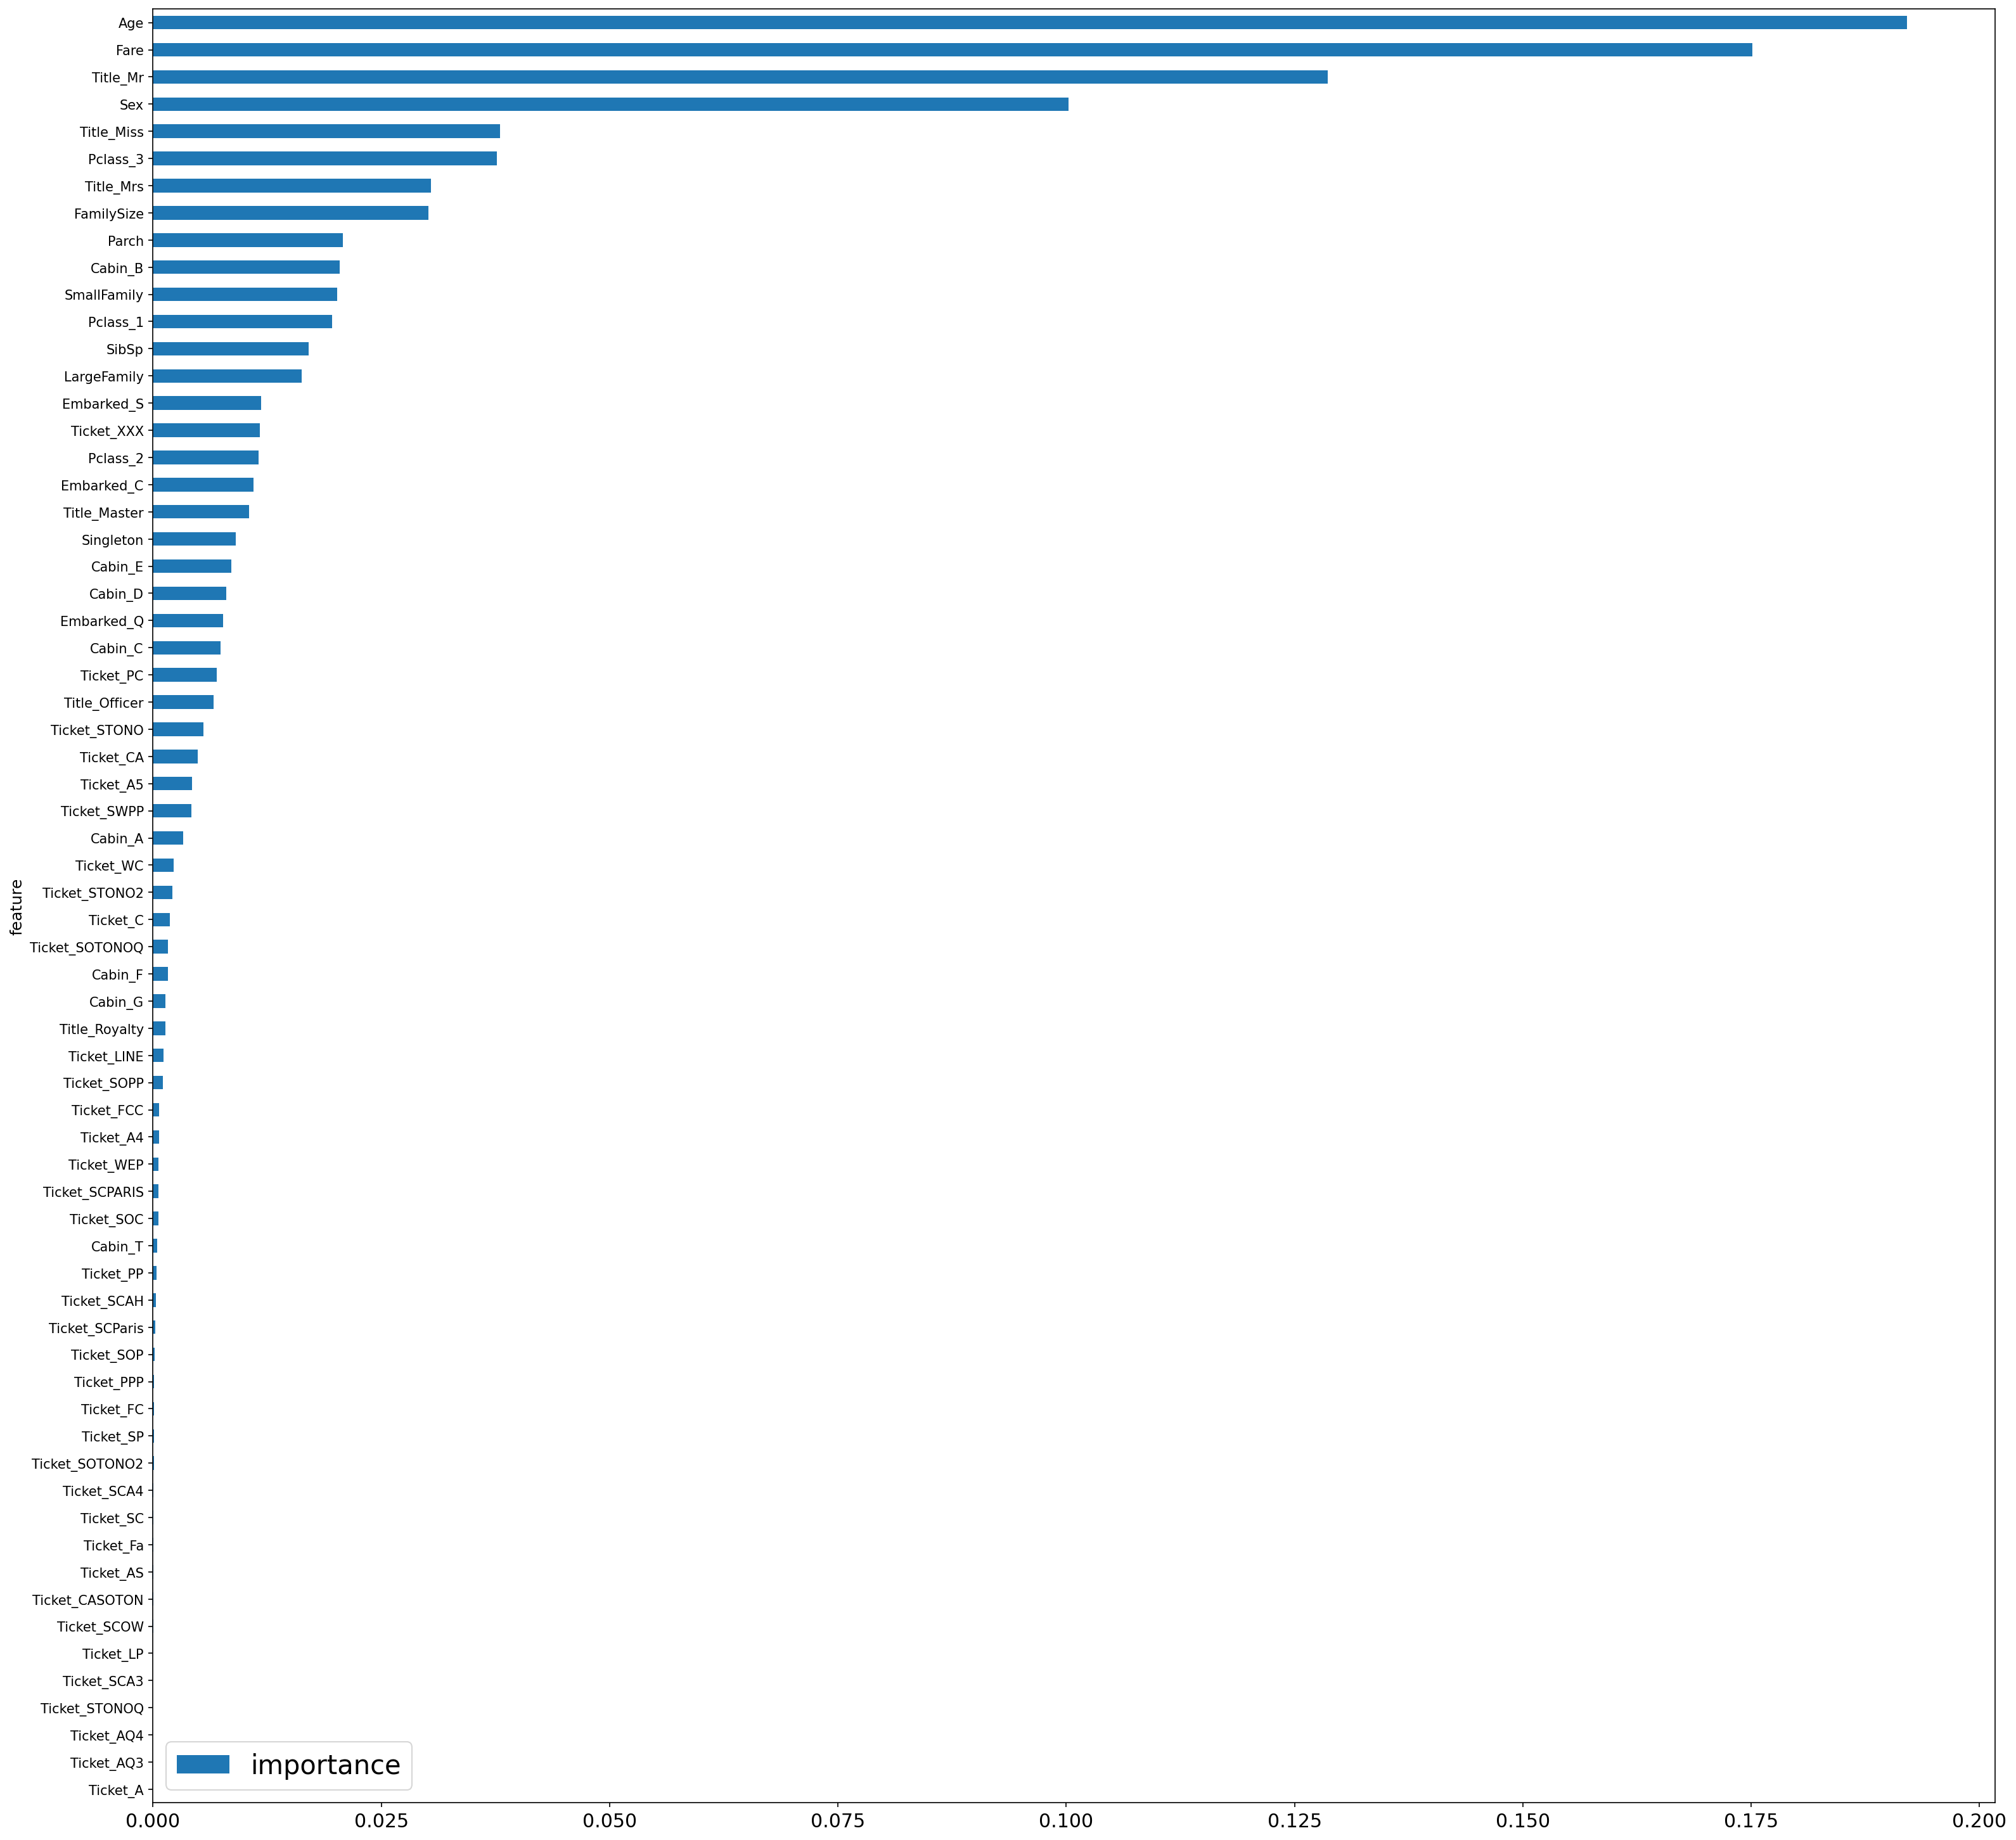

In [325]:
features = pd.DataFrame()
features['feature'] = train_data.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(25, 25))

In [326]:
test_data.isnull().sum().sum()

0

In [327]:
total_test = test_data.isnull().sum().sort_values(ascending=False)
percent_test = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data_test

,Total,Percent
LargeFamily,0,0.0
Cabin_C,0,0.0
Ticket_AS,0,0.0
Ticket_AQ4,0,0.0
Ticket_AQ3,0,0.0
...,...,...
Ticket_LP,0,0.0
Ticket_LINE,0,0.0
Ticket_Fa,0,0.0
Ticket_FCC,0,0.0


In [329]:
test_data.isnull().sum().sum()

0

In [330]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train_data)
print(train_reduced.shape)

(891, 14)


In [333]:
test_reduced = model.transform(test_data)
print(test_reduced.shape)

(418, 14)


In [334]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()
models = [logreg, logreg_cv, rf, gboost]
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8103069487163392
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.8125415855878476
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8159625886636119
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8305191136777352
****


In [335]:
run_gs = False
if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )
    grid_search.fit(train_data, targets)
    model = grid_search
    parameters = grid_search.best_params_
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    model = RandomForestClassifier(**parameters)
    model.fit(train_data, targets)

In [336]:
targets

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [338]:
output = model.predict(test_data).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('submission.csv', index=False)
submission = pd.read_csv("submission.csv")
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
